In [1]:

import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [25]:
# read in data

raw_data = pd.read_csv('../Melanoma/Melanoma_GSE910.csv_PD_1.csv')
raw_data.tail()

/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_77448/1872515278.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../Melanoma/Melanoma_GSE910.csv_PD_1.csv')


,Unnamed: 0,SRR5088813,SRR5088815,SRR5088818,SRR5088819,SRR5088821,SRR5088822,SRR5088824,SRR5088826,SRR5088827,...,SRR5088909,SRR5088911,SRR5088913,SRR5088914,SRR5088916,SRR5088920,SRR5088922,SRR5088924,SRR5088926,SRR5088929
56265,snoZ6,0.0,0.0,0.0,0.0,0.107470267770082,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56266,snosnR66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,uc_338,0.0688834145765135,0.0538417100762082,0.0342752018642915,0.025631630688741,0.0181426173338076,0.0539932701469603,0.0328505406713004,0.125934084620025,0.0171478087041197,...,0.003664563208162,0.031978130771298,0.0857459707118245,0.04071053428664,0.0512846604842121,0.158733159882816,0.18278951659712,0.0657273971922831,0.0777414803400673,0.0
56268,yR211F11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0355281824962792,0.0
56269,Response,N,N,UNK,N,N,N,R,N,UNK,...,N,R,N,N,N,N,N,R,N,R


In [26]:
# some re-formatting

# rename column

raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)


# transpose so columns are genes and rows are patients
t_data = raw_data.set_index('patient').T
# t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK

t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)
# split data

labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])


(56270, 52)
(51, 56270)
(49, 56270)


In [28]:
print(clean_data.index)

Index(['SRR5088813', 'SRR5088815', 'SRR5088819', 'SRR5088821', 'SRR5088822',
       'SRR5088824', 'SRR5088826', 'SRR5088829', 'SRR5088831', 'SRR5088834',
       'SRR5088836', 'SRR5088839', 'SRR5088840', 'SRR5088843', 'SRR5088846',
       'SRR5088849', 'SRR5088850', 'SRR5088853', 'SRR5088856', 'SRR5088857',
       'SRR5088861', 'SRR5088864', 'SRR5088866', 'SRR5088867', 'SRR5088872',
       'SRR5088878', 'SRR5088880', 'SRR5088883', 'SRR5088885', 'SRR5088887',
       'SRR5088890', 'SRR5088891', 'SRR5088895', 'SRR5088897', 'SRR5088898',
       'SRR5088900', 'SRR5088904', 'SRR5088906', 'SRR5088908', 'SRR5088909',
       'SRR5088911', 'SRR5088913', 'SRR5088914', 'SRR5088916', 'SRR5088920',
       'SRR5088922', 'SRR5088924', 'SRR5088926', 'SRR5088929'],
      dtype='object')


In [29]:
# drop any genes with > 90% missing data


clean_data= clean_data.dropna(thresh = clean_data.shape[0]*0.9, axis=1)
print(clean_data.shape)


(49, 56269)


In [30]:
# drop genes with >80% 0 input 
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

(49, 34329)


In [31]:
clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')


In [33]:
col_var = clean_data_numeric.var()
print(col_var.idxmax())
print(col_var.max())

FTL
173011830.68296516


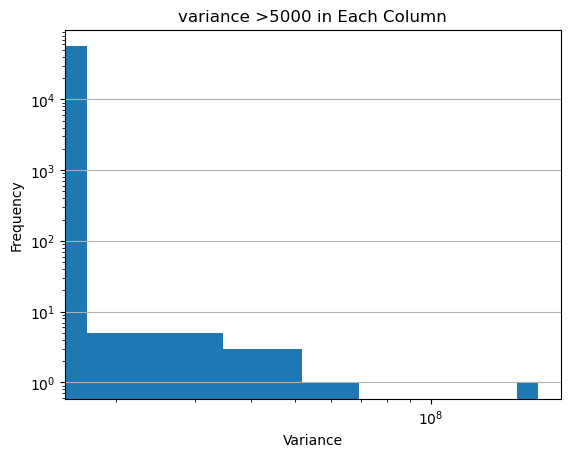

In [17]:
plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('variance >5000 in Each Column')
plt.grid(axis='y') 
plt.show()

In [34]:
top_100_var = col_var.nlargest(100)
top_100_var.to_csv("_GSE910_top_100_var.csv")

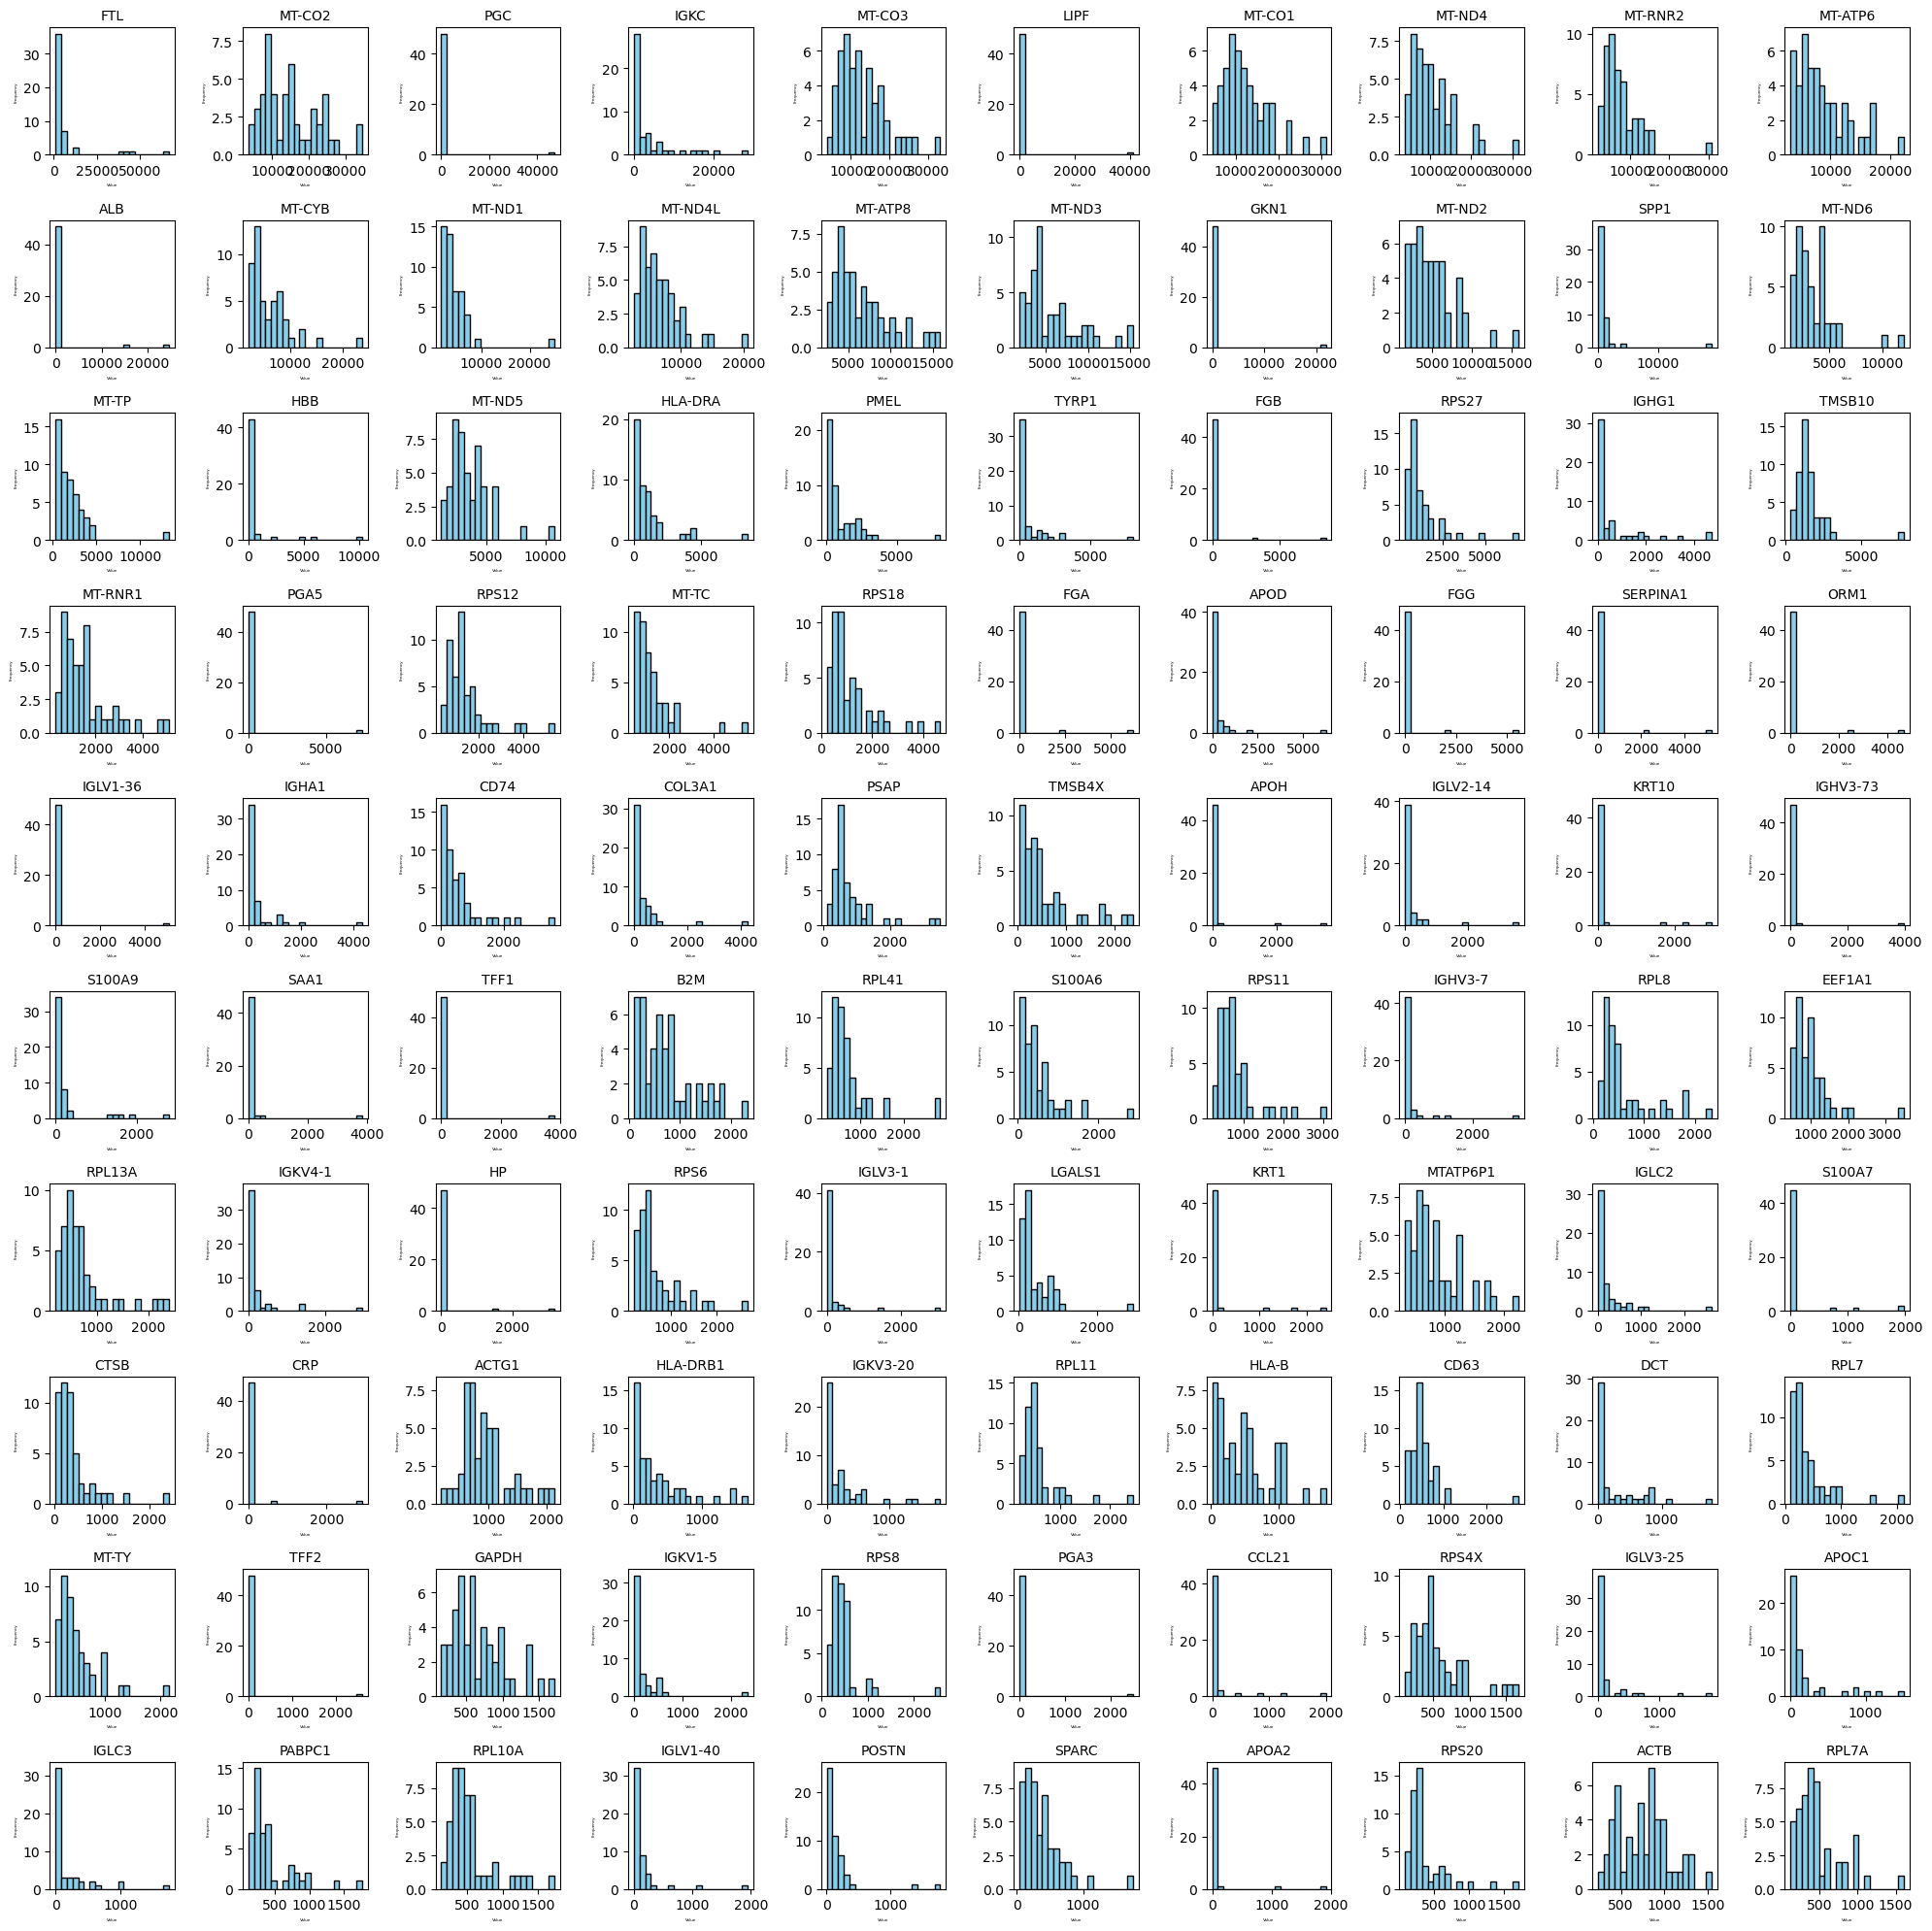

In [35]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]
    
    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')
    
    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)
    

plt.tight_layout()

plt.show()

In [36]:
top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

patient              FTL        MT-CO2           PGC          IGKC  \
SRR5088813   6828.580820  10168.177315      2.852395   1807.748498   
SRR5088815   3620.306011  22019.894926      0.047149    119.985514   
SRR5088819   1834.496017  15004.051035      0.264930      2.319158   
SRR5088821  13578.239179  23804.815147      0.000000   6781.965702   
SRR5088822   5219.258705  21932.578117      0.245035   3220.523382   
SRR5088824   4044.680242  10449.429635      0.058725  21171.439822   
SRR5088826   2810.139933   8034.373143      0.000000    546.713165   
SRR5088829   4996.311662   7481.993384      0.067524      5.795372   
SRR5088831   1756.604737   6375.723342      0.087204    401.196268   
SRR5088834   2932.291134   5782.792119      0.012000   6277.124340   
SRR5088836   2290.885971  15496.029322      1.698543    289.281106   
SRR5088839   1996.142189   3522.561168      6.888120    813.808046   
SRR5088840   1218.481742  14382.020930  47305.038147   3164.157102   
SRR5088843   3447.36

In [37]:
# log2 transformation

# note that samples from the Melanoma dataset GSE931 are already log2 transformed

# add 1 to all values for log2 transformation

top_100_var_data = top_100_var_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)

# subset GSE931 samples from rest
# gse931 = clean_data[clean_data.index.str.contains('GSM24457')]

# to_transform = clean_data[~clean_data.index.str.contains("GSM24457")]

# log2 transform
to_transform = top_100_var_data
log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)

# re-join data

# log2_data = pd.concat([gse931, log2_data], axis = 0)
log2_data.head()


/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_77448/4049563201.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_100_var_data = top_100_var_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)
/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_77448/4049563201.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)


patient,FTL,MT-CO2,PGC,IGKC,MT-CO3,LIPF,MT-CO1,MT-ND4,MT-RNR2,MT-ATP6,...,IGLC3,PABPC1,RPL10A,IGLV1-40,POSTN,SPARC,APOA2,RPS20,ACTB,RPL7A
SRR5088813,12.737581,13.311915,1.945756,10.820776,12.615688,2.329800,13.489412,13.581854,11.408613,13.217289,...,6.421573,7.851672,7.771989,5.765911,6.170569,7.884830,0.360299,7.856944,9.748931,7.581655
SRR5088815,11.822294,14.426585,0.066467,6.918691,13.959882,0.043341,13.921776,13.488657,12.963948,13.687384,...,1.979994,8.611881,7.972090,2.741738,7.049321,9.444820,0.138859,7.855385,9.726787,7.411481
SRR5088819,10.841954,13.873161,0.339058,1.730817,13.564184,0.149618,13.717979,13.586683,13.686792,13.049907,...,1.177724,10.785875,10.204110,0.080399,7.673210,7.834211,0.000000,10.735171,8.623257,9.615786
SRR5088821,13.729115,14.539026,0.000000,12.727700,13.920327,0.000000,14.148448,13.802107,13.289352,13.361653,...,7.078784,8.460838,8.409903,3.967094,6.497123,8.747892,0.201781,7.944151,9.888613,8.348250
SRR5088822,12.349906,14.420854,0.316186,11.653527,14.469452,0.497829,14.468694,13.966183,13.957528,14.072519,...,4.419963,9.445326,8.590191,5.824113,6.194931,7.662091,7.218075,9.297873,8.991797,8.829584


In [38]:
# z-score transformation (for PCA)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(log2_data)

scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()
print(scaled_data.shape)

(49, 100)


In [39]:
# export '/content/total_PD_1.csv'

# imputed log2 transformed data
# imputed_data.to_csv('imputed_data_v3.csv')

#log2 transformed
log2_data.to_csv('GSE910_log2_top_100.csv')

# normalized version of above^ (for PCA)
scaled_data.to_csv('GSE910_scaled_top_100.csv')

# true labels (response y/n)
labels.to_csv('GSE910_labels.csv')